# **NN**

## **Data Preparation**

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', sep=';',decimal=",") 

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


##### Drop Columns Unnamed

First of all we saw that there are 2 columns that contain only NaN values, so we dropped out that columns.

The columns are labeled as Unnamed: 15 and Unnamed: 16

In [ ]:
df = df.drop(["Unnamed: 15","Unnamed: 16"], axis=1)

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


##### Drop column NMHC(GT)

In this column there are too much -200 values (missing values) so also if we replace with mean of the feature is too much dependent from this missing values.

In [ ]:
df = df.drop(["NMHC(GT)"], axis=1)

##### NaN Values

Drop columns with NaN, the last 2, Unnamed:15 and Unnamed:16
Drop rows with NaN , there only 1% circa.


In [ ]:
df.isnull().any()

Date             True
Time             True
CO(GT)           True
PT08.S1(CO)      True
C6H6(GT)         True
PT08.S2(NMHC)    True
NOx(GT)          True
PT08.S3(NOx)     True
NO2(GT)          True
PT08.S4(NO2)     True
PT08.S5(O3)      True
T                True
RH               True
AH               True
dtype: bool

In [ ]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [ ]:
df.shape

(9471, 14)

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df= df.dropna()

In [ ]:
df.shape

(9357, 14)

In [ ]:
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


After the drop of NaN values in rows we have passed from 9471 rows to 9357 rows.


In [ ]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

##### Missing values with "-200" value

In [ ]:
df.isin([-200.0]).any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

We know if there is a value with -200 is a missing value by the discription of the dataset, so, we want replace this values with the mean of the each column

In [ ]:
df1=df.replace(-200.0, np.nan)

In [ ]:
df1.isin([-200]).any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
df1.isnull().any()

Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

In [ ]:
dataframe= df1.fillna(df1.mean())

In [ ]:
dataframe.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


Now our dataset is called dataframe, we dropped out NaN columns and NMHC(GT) column, we dropped NaN values and we replaced the -200 missing values with the mean of the column.

##### Deal with Data and Time

In this section we are going to deal with Date and Time format

###### Date

The problem is that i need the format year - month - day to use datetime function, so i have to switch month with day 

In [ ]:
dataframe['Date']=pd.to_datetime(dataframe.Date, dayfirst=True)

In [ ]:
dataframe['Weekday']=dataframe.Date.dt.weekday

In [ ]:
dataframe['Month']=dataframe.Date.dt.month

In [ ]:
dataframe.dtypes


Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
dtype: object

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday,Month
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4


Now the Data Format it's ok and also i create a new feature Weekday with 0=monday and ..... and 6=Sunday.

###### Time

From Time feature i figure out only the hour and assign it to new feature Hour

In [ ]:
dataframe['Hour'] = pd.to_datetime(dataframe['Time'],format= '%H.%M.%S').dt.hour
type(dataframe['Time'][0])

str

In [ ]:
dataframe.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
Hour                      int64
dtype: object

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday,Month,Hour
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3,18
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3,19
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3,20
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3,21
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4,10
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4,11
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4,12
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4,13


##### New features

At this point we want implement some new features, like 'is night' , 'is evening' , 'officheHour' and 'is weekend' .
Aftet that for each variable we transform from boolean to int 0 and 1 .
1 == True
0 == False

In [ ]:
# dataframe['is Evening'] = (dataframe['Hour'] >= 18) 

In [ ]:
# dataframe['is Evening'] = dataframe['is Evening'].astype(int)

In [ ]:
# dataframe['is Night'] = ( (dataframe['Hour'] >= 18) | (dataframe['Hour'] <6) )

In [ ]:
# dataframe['is Night'] = dataframe['is Night'].astype(int)

In [ ]:
# dataframe['OfficeHour'] = ( (dataframe['Hour'] >= 9) & (dataframe['Hour'] <=18 ) )

In [ ]:
# dataframe['OfficeHour'] = dataframe['OfficeHour'].astype(int)

In [ ]:
dataframe['Weekend'] = ( (dataframe['Weekday'] == 5) | (dataframe['Weekday'] == 6) )

In [ ]:
dataframe['Weekend'] = dataframe['Weekend'].astype(int)

In [ ]:
dataframe

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Weekday,Month,Hour,Weekend
0,2004-03-10,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,3,18,0
1,2004-03-10,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,3,19,0
2,2004-03-10,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,3,20,0
3,2004-03-10,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,3,21,0
4,2004-03-10,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,3,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,0,4,10,0
9353,2005-04-04,11.00.00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,0,4,11,0
9354,2005-04-04,12.00.00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,0,4,12,0
9355,2005-04-04,13.00.00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,0,4,13,0


In [ ]:
dataframe.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Weekday                   int64
Month                     int64
Hour                      int64
Weekend                   int64
dtype: object

In [ ]:
dataframe['Weekend'].value_counts()

0    6669
1    2688
Name: Weekend, dtype: int64

Lavoreremo su un dataset che contiene solo i gas, la T, Rh e la varibiale dipendente Weekend

In [ ]:
df2 = dataframe[["CO(GT)", "PT08.S1(CO)", "C6H6(GT)",	"PT08.S2(NMHC)", "NOx(GT)",	"PT08.S3(NOx)",	"NO2(GT)",	"PT08.S4(NO2)",	"PT08.S5(O3)","T"	,"RH"	,"Weekend"]]

In [ ]:
df2.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,Weekend
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0


In [ ]:
df2.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,Weekend
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score


## **Standardizzazione + split**

In [ ]:
scaler = StandardScaler()

Before standardize i need to drop out the depenedet variable

In [ ]:
scaler.fit(df2.drop('Weekend',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df2.drop('Weekend',axis=1))

In [ ]:
df2_feat = pd.DataFrame(scaled_features,columns=df2.columns[:-1])
df2_feat.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,0.339856,1.222702,0.248813,0.408519,-0.418252,0.875962,-0.002078,0.694669,0.627494,-0.544962,-0.019689
1,-0.116071,0.903123,-0.093547,0.060588,-0.743974,1.344717,-0.480235,0.302742,-0.130331,-0.579615,-0.090386
2,0.035905,1.420088,-0.148325,-0.000586,-0.599209,1.209652,0.020692,0.290955,0.130812,-0.741330,0.280772
3,0.035905,1.297897,-0.120936,0.033824,-0.387231,1.018972,0.202847,0.376413,0.461080,-0.845290,0.634256
4,-0.420023,0.809130,-0.490684,-0.394398,-0.599209,1.467865,0.066230,0.099412,0.222979,-0.822188,0.610691


Now i recompute the split on scaled features and without dependent variable:


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df2['Weekend'],test_size=0.20)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Il piano è vedere prima il Single Perceptron poi il Multilayer Perceptron esplorando le varie activation funtions: *tanh*, *Logistic* and *identity*.

## **Single Perceptron**

Iniziamo con il single perceptron, i dati sono stati precedentemente normalizzati

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=150, tol=0.001, eta0=0.01, random_state=10)
ppn.fit(X_train, y_train)

y_pred = ppn.predict(X_test)


In [ ]:
print(accuracy_score(y_test, y_pred))

0.719017094017094


Il perceptron con max_iter=150 , tol=0.001 , eta0=0.01 ha dato un accuracy score di 0.72

## **Sklearn Multilayer Perceptron**

Iniziamo esplorando la libreria di Scikit-learn con MLPClassifier e vediamo cosa viene fuori con i valori di default

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8205128205128205
F1-score [0.88317107 0.61290323]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1368
           1       0.73      0.53      0.61       504

    accuracy                           0.82      1872
   macro avg       0.79      0.73      0.75      1872
weighted avg       0.81      0.82      0.81      1872



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


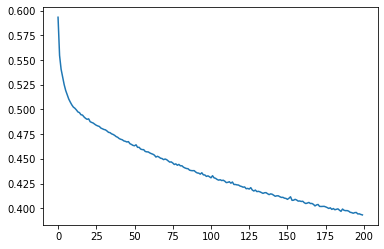

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

ora voglio andare a provare con hidden layers diversi cercare la migliore activation funcion che la libreria di Scikit-Learn mette a disposizione.


Per gli hidden layers non so quali scegliere, da notebook prof sono evidenziati 3 valori:
- 128
- 64 
- 32

Non avendo capito a pieno come scelgiere gli hidden layers uso quelli dettati dal prof (128,64,32)

### Activation Function : Logistic

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='logistic', early_stopping=False, momentum=0.9, random_state=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7548076923076923
F1-score [0.85451664 0.22071307]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1368
           1       0.76      0.13      0.22       504

    accuracy                           0.75      1872
   macro avg       0.76      0.56      0.54      1872
weighted avg       0.76      0.75      0.68      1872



Questo è peggio di prima del caso di default

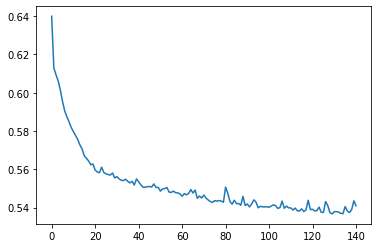

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

### Activation Function : tanh

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8424145299145299
F1-score [0.8919018  0.70935961]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1368
           1       0.70      0.71      0.71       504

    accuracy                           0.84      1872
   macro avg       0.80      0.80      0.80      1872
weighted avg       0.84      0.84      0.84      1872



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Questo è il meglio

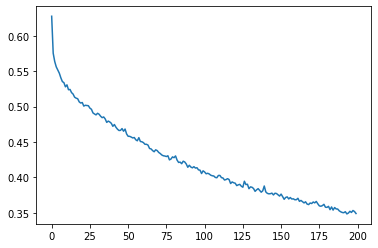

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

### Activation Function : Identity

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive', 
                    activation='identity', early_stopping=False, momentum=0.9, random_state=10)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7430555555555556
F1-score [0.83875293 0.36793693]
              precision    recall  f1-score   support

           0       0.77      0.91      0.84      1368
           1       0.54      0.28      0.37       504

    accuracy                           0.74      1872
   macro avg       0.66      0.60      0.60      1872
weighted avg       0.71      0.74      0.71      1872



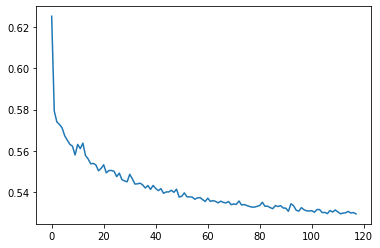

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

**Il multilayer Percepton migliore è il classificatore con activation: tanh**

## **Keras Deep Neural Networks**

Per quanto riguarda il Deep Neural Network, la rete neurale è stata sviluppata utilizzando la liberia Keras, in particolare i modelli Sequential e Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Come si può vedere dal codice Il primo layer è stato impostato come Sequential e gli altri 3 modelli come Dense.

In [ ]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=50, batch_size=10).history

Epoch 1/50
749/749 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7325
Epoch 2/50
749/749 [==============================] - 1s 1ms/step - loss: 0.5004 - accuracy: 0.7540
Epoch 3/50
749/749 [==============================] - 1s 1ms/step - loss: 0.4868 - accuracy: 0.7598
Epoch 4/50
749/749 [==============================] - 1s 1ms/step - loss: 0.4744 - accuracy: 0.7651
Epoch 5/50
749/749 [==============================] - 1s 1ms/step - loss: 0.4622 - accuracy: 0.7743
Epoch 6/50
749/749 [==============================] - 1s 1ms/step - loss: 0.4523 - accuracy: 0.7789
Epoch 7/50
749/749 [==============================] - 1s 1ms/step - loss: 0.4430 - accuracy: 0.7833
Epoch 8/50
749/749 [==============================] - 1s 1ms/step - loss: 0.4367 - accuracy: 0.7894
Epoch 9/50
749/749 [==============================] - 1s 1ms/step - loss: 0.4276 - accuracy: 0.7997
Epoch 10/50
749/749 [==============================] - 1s 1ms/step - loss: 0.4175 - accuracy: 0.7980

In [ ]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=50, batch_size=50).history

Epoch 1/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7173
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7460
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7585
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7637
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7702
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4707 - accuracy: 0.7725
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.7773
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7794
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.7838
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7864

Come ottimizzatore, è stato scelto il parametro ‘ADAM’, invece come funzione di Loss, ossia la **funzione obiettivo** che il modello tenta di minimizzare, è stata scelta ‘binary_crossentropy’ (ho lasciato quella scelta da prof).

Vediamo come andata:

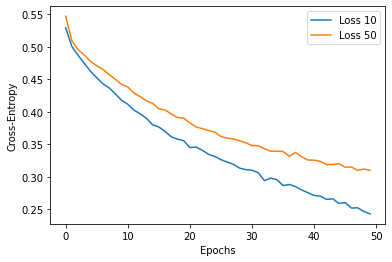

In [ ]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [ ]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

59/59 [==============================] - 0s 766us/step - loss: 0.3746 - accuracy: 0.8360
Loss 0.339812, Accuracy 0.849893
Loss 0.374640, Accuracy 0.836004


La variazione della dimensione del batch non ha apportato grandi differenze, infatti i modelli sono alquanto simili come dimostrano l’accuracy e il loss.

Batch dim=10 :
- Accuracy 0.0.849893
- Loss 0.339812


Batch dim=50 :
- Accuracy 0.836004
- Loss 0.374640


Ora invece proviamo estraendo dal training set dei records da utilizzare come validation set: l’80% delle istanze è stato usato per addestrare il
modello e il restante 20% per validarlo.

Si va anche su con le epoche fino a 1000 tenendo un batch_size di 10, mi aspetto di avere risultati migliori

In [ ]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=10).history

Epoch 1/1000
749/749 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7253 - val_loss: 0.4880 - val_accuracy: 0.7623
Epoch 2/1000
749/749 [==============================] - 1s 1ms/step - loss: 0.4985 - accuracy: 0.7613 - val_loss: 0.4900 - val_accuracy: 0.7591
Epoch 3/1000
749/749 [==============================] - 1s 1ms/step - loss: 0.4839 - accuracy: 0.7625 - val_loss: 0.4759 - val_accuracy: 0.7682
Epoch 4/1000
749/749 [==============================] - 1s 1ms/step - loss: 0.4701 - accuracy: 0.7746 - val_loss: 0.4607 - val_accuracy: 0.7794
Epoch 5/1000
749/749 [==============================] - 1s 1ms/step - loss: 0.4613 - accuracy: 0.7774 - val_loss: 0.4454 - val_accuracy: 0.7863
Epoch 6/1000
749/749 [==============================] - 1s 1ms/step - loss: 0.4492 - accuracy: 0.7844 - val_loss: 0.4372 - val_accuracy: 0.7970
Epoch 7/1000
749/749 [==============================] - 1s 1ms/step - loss: 0.4400 - accuracy: 0.7897 - val_loss: 0.4399 - val_accuracy:

In [ ]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))

59/59 [==============================] - 0s 815us/step - loss: 1.3686 - accuracy: 0.8632
Loss 0.339812, Accuracy 0.849893
Loss 0.374640, Accuracy 0.836004
Loss 1.368555, Accuracy 0.863248


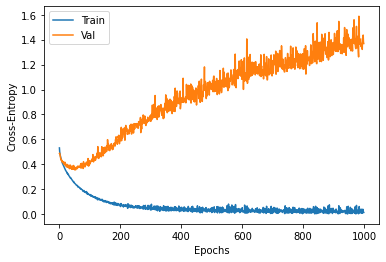

In [ ]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

Come prevedibile riesco a ottenere un valore di Accuracy + alto = 0.863248 ma allo stesso tempo il valore di Loss è alzato drasticamente a 1.368555

A questo punto la successiva analisi riguarda  l'evitare problemi di overfitting.
Si è deciso quindi di applicare gli approcci di Early Stopping, L2 Regularization e Drop-Out e infine vedere tra questi 3 quale fosse il migliore
in termini di accuratezza.

### **Early Stopping**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


The most relevant arguments are:

- monitor: quantity to be monitored
- patience: number of epochs with no improvement after which training will be stopped

per le operezioni successive il Dataset è stato splittato in training set e validation set, con rispettive percentuali del 80% e 20%; 



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, 
                      batch_size=10, callbacks=[es,mc]).history

Epoch 1/150
599/599 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7261 - val_loss: 0.5070 - val_accuracy: 0.7615
Epoch 2/150
599/599 [==============================] - 1s 1ms/step - loss: 0.5037 - accuracy: 0.7497 - val_loss: 0.5135 - val_accuracy: 0.7435
Epoch 3/150
599/599 [==============================] - 1s 1ms/step - loss: 0.4879 - accuracy: 0.7637 - val_loss: 0.4853 - val_accuracy: 0.7842
Epoch 4/150
599/599 [==============================] - 1s 1ms/step - loss: 0.4774 - accuracy: 0.7624 - val_loss: 0.4858 - val_accuracy: 0.7802
Epoch 5/150
599/599 [==============================] - 1s 1ms/step - loss: 0.4667 - accuracy: 0.7685 - val_loss: 0.4841 - val_accuracy: 0.7862
Epoch 6/150
599/599 [==============================] - 1s 1ms/step - loss: 0.4583 - accuracy: 0.7754 - val_loss: 0.4657 - val_accuracy: 0.7902
Epoch 7/150
599/599 [==============================] - 1s 1ms/step - loss: 0.4476 - accuracy: 0.7834 - val_loss: 0.4681 - val_accuracy: 0.7929

si è stoppata a 44 su 150 epoche

In [ ]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

59/59 [==============================] - 0s 830us/step - loss: 0.4038 - accuracy: 0.8248
Loss 0.339812, Accuracy 0.849893
Loss 0.374640, Accuracy 0.836004
Loss 1.368555, Accuracy 0.863248
Loss 0.403752, Accuracy 0.824786


Il modello con Early Stopping ha dato un accuracy di 0.863248 e Loss 0.403752

NOTA BENE: fatto meglio dopo tutti e 3 insieme la valutazione di accuracy

### **L2 Regularization**

In [ ]:
from tensorflow.keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(h_dim, activation='relu', kernel_regularizer=l2(0.01)))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, 
                    batch_size=10, callbacks=[es,mc]).history

Epoch 1/150
599/599 [==============================] - 1s 2ms/step - loss: 1.7880 - accuracy: 0.7148 - val_loss: 1.0069 - val_accuracy: 0.7422
Epoch 2/150
599/599 [==============================] - 1s 2ms/step - loss: 0.7892 - accuracy: 0.7276 - val_loss: 0.7058 - val_accuracy: 0.7408
Epoch 3/150
599/599 [==============================] - 1s 2ms/step - loss: 0.6398 - accuracy: 0.7209 - val_loss: 0.5860 - val_accuracy: 0.7355
Epoch 4/150
599/599 [==============================] - 1s 2ms/step - loss: 0.5800 - accuracy: 0.7308 - val_loss: 0.5961 - val_accuracy: 0.7355
Epoch 5/150
599/599 [==============================] - 1s 2ms/step - loss: 0.5735 - accuracy: 0.7295 - val_loss: 0.6129 - val_accuracy: 0.7495
Epoch 6/150
599/599 [==============================] - 1s 2ms/step - loss: 0.5663 - accuracy: 0.7370 - val_loss: 0.6004 - val_accuracy: 0.7328
Epoch 7/150
599/599 [==============================] - 1s 2ms/step - loss: 0.5653 - accuracy: 0.7353 - val_loss: 0.5517 - val_accuracy: 0.7515

si è stoppata a 28 su 150

### **Drop-Out**

In [ ]:
from tensorflow.keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(h_dim, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=150, batch_size=10, callbacks=[es,mc]).history

Epoch 1/150
599/599 [==============================] - 1s 2ms/step - loss: 4.5672 - accuracy: 0.7039 - val_loss: 4.2349 - val_accuracy: 0.7255
Epoch 2/150
599/599 [==============================] - 1s 2ms/step - loss: 4.5672 - accuracy: 0.7039 - val_loss: 4.2349 - val_accuracy: 0.7255
Epoch 3/150
599/599 [==============================] - 1s 2ms/step - loss: 4.5672 - accuracy: 0.7039 - val_loss: 4.2349 - val_accuracy: 0.7255
Epoch 4/150
599/599 [==============================] - 1s 2ms/step - loss: 4.5672 - accuracy: 0.7039 - val_loss: 4.2349 - val_accuracy: 0.7255
Epoch 5/150
599/599 [==============================] - 1s 2ms/step - loss: 4.5672 - accuracy: 0.7039 - val_loss: 4.2349 - val_accuracy: 0.7255
Epoch 6/150
599/599 [==============================] - 1s 2ms/step - loss: 4.5672 - accuracy: 0.7039 - val_loss: 4.2349 - val_accuracy: 0.7255
Epoch 7/150
599/599 [==============================] - 1s 2ms/step - loss: 4.5672 - accuracy: 0.7039 - val_loss: 4.2349 - val_accuracy: 0.7255

Questo si è stoppato a 11 epoche su 150

### Conclusioni su i 3 approcci sopra

In [ ]:
from tensorflow.keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

59/59 [==============================] - 0s 948us/step - loss: 4.1529 - accuracy: 0.7308


In [ ]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.386531, Accuracy 0.821581
Loss 0.530034, Accuracy 0.760150
Loss 4.152871, Accuracy 0.730769


**Tra i 3 approcci usati il migliore è Early Stopping con accuracy di 0.821581 e Loss 0.368531.**

Gli altri due nettamente peggio, riportali in una tabellina per report

### **Hyper-parameter Tuning**

valutazione iperparametri del modello Keras per l’ottimizzazione. Usata libreria Keras e per ricercare i migliori parametri si è stato utilizzato l’approccio RandomizedSearchCv.

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def build_model(n_layers=2, h_dim=64, activation='relu', optimizer='adam'):
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    
    model.add(Dense(h_dim, activation=activation, input_shape=(n_feature,)))
    for i in range(n_layers-1):
        model.add(Dense(h_dim, activation=activation))
    #linear activation
    model.add(Dense(1))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Come optimizer ho imposto io 'adam' perchè con il codice del prof che passava ['adagrad', 'adam'] nel codice sotto non andava, non so perchè.

i parametri sono:
- n_layers = 1, 2, 3
- h_dim = 32, 64, 128
- activation = 'relu', 'tanh'
- optimizer = adam

In [ ]:
n_layers = [1, 2, 3]
h_dim = [32, 64, 128]
activation = ['relu', 'tanh']
#optimizer = ['adagrad', 'adam']
params = dict(optimizer=optimizer, n_layers=n_layers, h_dim=h_dim, activation=activation)

In [ ]:
model = KerasRegressor(build_fn=build_model)

rnd = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
rnd_result = rnd.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

63/63 [==============================] - 0s 752us/step - loss: 0.6285 - accuracy: 0.7670


In [ ]:
print("Best: %f using %s" % (-rnd_result.best_score_, rnd_result.best_params_))
means = rnd_result.cv_results_['mean_test_score']
stds = rnd_result.cv_results_['std_test_score']
params = rnd_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 0.511004 using {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 64, 'activation': 'tanh'}
0.518587 (0.010951) with: {'optimizer': 'adagrad', 'n_layers': 1, 'h_dim': 32, 'activation': 'tanh'}
0.687030 (0.009361) with: {'optimizer': 'adagrad', 'n_layers': 3, 'h_dim': 32, 'activation': 'relu'}
0.511004 (0.011664) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 64, 'activation': 'tanh'}
0.675757 (0.246150) with: {'optimizer': 'adam', 'n_layers': 3, 'h_dim': 32, 'activation': 'tanh'}
0.787505 (0.132566) with: {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 128, 'activation': 'relu'}


In [ ]:
clf = rnd_result.best_estimator_.model

loss, acc = clf.evaluate(X_test, y_test)
print('Loss %f, Accuracy %f' % (loss, acc))

59/59 [==============================] - 0s 745us/step - loss: 0.4880 - accuracy: 0.7863
Loss 0.488026, Accuracy 0.786325


Il miglior risultato ottenuto è :

**Best: 0.511004 using {'optimizer': 'adam', 'n_layers': 1, 'h_dim': 64, 'activation': 'tanh'}**

Con un Loss di 0.488026 e Accuracy di 0.786325